In [1]:
# Evitar warnings
import warnings
warnings.filterwarnings('ignore')

# Librerías
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed
seed = 1337
np.random.seed(seed)

# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

1. Cargamos nuestras principales librerías de stack en data science.
2. Utilizamos una `seed` para reproducir nuestros experimentos durante el estudio.
3. Formateamos a 2 decimales en valores reales en nuestro `Dataframe`.

In [2]:
# Cargamos los datos
url1 = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/dataknow/train.csv'
url2 = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/dataknow/test.csv'

dataset = pd.read_csv(url1, encoding='utf-8')
X_val = pd.read_csv(url2, encoding='utf-8')

# Estructura del dataset
dataset.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
1,9000000002,1,0.00,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,"5,643,700.00","500,000.00",1,NaN,NaN,NaN,5,289.99,"4,552.41","2,029.90"
2,9000000003,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
3,9000000004,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
4,9000000005,1,0.00,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.00,0.00,1,NaN,NaN,NaN,1,NaN,"1,482.35",1.00


1. Cargamos nuestro dataset.
2. Visualizamos su estructura.

In [3]:
# Dimensiones
print('\t\tDataset')
print(f'Filas: {dataset.shape[0]}')
print(f'Columnas: {dataset.shape[1]}')

		Dataset
Filas: 2965
Columnas: 26


* Nos familiarizamos con nuestro dataset para conocer su número de filas y columnas.

In [4]:
# Función para reducir el peso en memoria de un DataFrame
def downcast_dtypes(data:DataFrame) -> DataFrame:

    """
    Function to downcast any type variable

    Args:
        dataframe: DataFrame
    Returns
        DataFrame: Downcasted DataFrame
    """

    start = data.memory_usage(deep=True).sum() / 1024 ** 2
    float_cols = [col for col in data if data[col].dtype == 'float64']
    int_cols = [col for col in data if data[col].dtype in ['int64', 'int32']]
    object_cols = [col for col in data if data[col].dtype in ['object', 'bool']]

    data[float_cols] = data[float_cols].astype(np.float32)
    data[int_cols] = data[int_cols].astype(np.int16)
    data[object_cols] = data[object_cols].astype('category')

    end = data.memory_usage(deep=True).sum() / 1024 ** 2
    saved = (start - end) / start * 100
    print(f'Memory Saved: {saved:0.2f}%', '\n')
    data.info()

    return data 


dataset = downcast_dtypes(dataset)
X_val = downcast_dtypes(X_val)

Memory Saved: 84.33% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               2965 non-null   int16   
 1   FRAUDE           2965 non-null   int16   
 2   VALOR            2965 non-null   float32 
 3   HORA_AUX         2965 non-null   int16   
 4   Dist_max_NAL     2965 non-null   float32 
 5   Canal1           2965 non-null   category
 6   FECHA            2965 non-null   int16   
 7   COD_PAIS         2965 non-null   category
 8   CANAL            2965 non-null   category
 9   DIASEM           2965 non-null   int16   
 10  DIAMES           2965 non-null   int16   
 11  FECHA_VIN        2941 non-null   float32 
 12  OFICINA_VIN      2941 non-null   float32 
 13  SEXO             2910 non-null   category
 14  SEGMENTO         2941 non-null   category
 15  EDAD             2941 non-null   float32 
 16  INGRESOS         29

* Reducimos el espacio en memoria al downcastear los datos.

In [5]:
# Homogenizamos los nombres de los predictores
dataset.rename(columns=str.lower, inplace=True)
X_val.rename(columns=str.lower, inplace=True)

# Creamos una copia del dataset origignal
data = dataset.copy()

# Dropeamos las variables innecesarias en nuestro pandas dataframe
data = data.drop(['fecha', 'fraude', 'id'], axis=1)
data.head()

,valor,hora_aux,dist_max_nal,canal1,cod_pais,canal,diasem,diames,fecha_vin,oficina_vin,...,ingresos,egresos,nropaises,dist_sum_inter,dist_mean_inter,dist_max_inter,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
0,0.00,13,659.13,ATM_INT,US,ATM_INT,5,1,"20,120,306.00",392.00,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
1,0.00,17,594.77,ATM_INT,US,ATM_INT,5,15,"20,050,416.00",716.00,...,"5,643,700.00","500,000.00",1,NaN,NaN,NaN,5,289.99,"4,552.41","2,029.90"
2,0.00,13,659.13,ATM_INT,US,ATM_INT,5,1,"20,120,306.00",392.00,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
3,0.00,13,659.13,ATM_INT,US,ATM_INT,5,1,"20,120,306.00",392.00,...,"1,200,000.00","1,200,000.00",1,NaN,NaN,NaN,6,474.94,"4,552.41","5,224.36"
4,0.00,0,1.00,ATM_INT,CR,ATM_INT,0,10,"20,141,008.00",788.00,...,0.00,0.00,1,NaN,NaN,NaN,1,NaN,"1,482.35",1.00


1. Renombramos nuestros predictores a minúsculas para facilidad en la manipulación de ellos.
2. Creamos una copia de nuestro `Dataframe` por buenas prácticas y para realizar cambios.
3. Nos deshacemos de aquellos predictores que no agregan información al modelo.

In [6]:
# Resumen estadístico
data.describe()

,valor,hora_aux,dist_max_nal,diasem,diames,fecha_vin,oficina_vin,edad,ingresos,egresos,nropaises,dist_sum_inter,dist_mean_inter,dist_max_inter,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
count,"2,965.00","2,965.00","2,965.00","2,965.00","2,965.00","2,941.00","2,941.00","2,941.00","2,941.00","2,941.00","2,965.00","1,418.00","1,418.00","1,418.00","2,965.00","2,508.00","2,965.00","2,965.00"
mean,"503,569.53",14.96,314.66,3.14,13.49,"20,009,198.00",416.43,40.01,"14,491,038.00","8,506,309.00",1.77,"17,354.69","4,144.32","4,985.44",3.94,196.59,"4,379.83","1,765.21"
std,"985,949.69",6.35,295.14,2.09,9.13,"92,604.40",290.26,12.98,"56,373,112.00","61,791,608.00",1.04,"25,168.02","1,794.83","2,655.08",2.75,192.03,"1,779.74","2,398.67"
min,0.00,0.00,1.00,0.00,1.00,"19,111,112.00",1.00,0.00,0.00,0.00,1.00,904.81,904.81,904.81,1.00,4.48,0.00,1.00
25%,"90,160.01",12.00,24.83,1.00,4.00,"19,951,024.00",168.00,31.00,"2,500,000.00","500,000.00",1.00,"6,474.20","3,178.21","4,552.41",2.00,60.80,"4,552.41",139.87
50%,"243,591.25",16.00,243.62,3.00,15.00,"20,011,228.00",360.00,38.00,"5,800,000.00","1,800,000.00",1.00,"9,104.82","4,552.41","4,552.41",3.00,127.70,"4,552.41",836.08
75%,"505,819.00",20.00,594.77,5.00,21.00,"20,080,812.00",659.00,47.00,"12,740,000.00","4,500,000.00",2.00,"21,376.45","4,552.41","4,552.41",5.00,269.08,"4,552.41","2,533.44"
max,"20,014,064.00",23.00,"1,310.46",6.00,31.00,"20,150,428.00",967.00,133.00,"1,940,070,016.00","1,600,000,000.00",9.00,"758,837.94","16,328.81","17,780.33",20.00,"1,217.57","21,991.20","18,832.06"


* Un resumen estadístico con las principales variables numéricas.
    - Vemos que la media de la **edad** de las personas registradas se encuentra en 40 años.
    - El valor mínimo de la **edad** es 0 lo cual no tiene sentido.
    - El valor máximo de la **edad** es 133 lo cual tampoco tiene sentido (en codiciones normales).
    - Los rangos intercuatílicos de los **ingresos** entre el mínimo y el máximo son enormes 0 y 1,940,070,016 respectivamente.
* Probablemente habrán muchos **outliers** y variables **sesgadas** basada en la distribución de algunas variables.

### **Capturamos los tipos de variables**

In [7]:
# Función para capturar los tipos de variables
def capture_variables(data:DataFrame) -> tuple:
    
    """
    Function to capture the types of Dataframe variables

    Args:
        dataframe: DataFrame
    Returns
        variables: A tuple of lists
    
    The order to unpack variables:
    1. numericals
    2. categoricals
    3. temporary
    4. discretes
    5. continous
    """

    numericals = list(data.select_dtypes(include = [np.int16, np.float32]).columns)
    categoricals = list(data.select_dtypes(include = ['category', 'bool']).columns)
    temporary = list(data.select_dtypes(include = ['datetime', 'timedelta']).columns)
    discretes = [col for col in data[numericals] if len(data[numericals][col].unique()) < 20]
    continuous = [col for col in data[numericals] if col not in discretes]

    # Variables
    print('\t\tTipos de variables')
    print(f'Hay {len(continuous)} variables continuas')
    print(f'Hay {len(discretes)} variables discretas')
    print(f'Hay {len(temporary)} variables temporales')
    print(f'Hay {len(categoricals)} variables categóricas')

    variables = tuple((numericals, categoricals, temporary, discretes, continuous))
    
    # Retornamos una tupla de listas
    return variables


variables = capture_variables(data=data)

# Unpacking
numericals, categoricals, temporary, discretes, continuous = variables

		Tipos de variables
Hay 15 variables continuas
Hay 3 variables discretas
Hay 0 variables temporales
Hay 5 variables categóricas


1. Capturamos los tipos de variables posibles de nuestro dataset.
2. Hacemos unpacking para almacenarlas como listas.

### **Valores faltantes**

In [8]:
# Función para observar variables con datos nulos y su porcentaje
def nan_values(data:DataFrame, variables:list, variable_type:str):
    """
    Function to observe variables with nan values and their percentages

    Args:
        data: DataFrame
        variables: list
        variable_type: str
    Returns:
        print: Variables that meet this condition
    """
    print('Variables ' + variable_type)

    for var in variables:
        if data[var].isnull().sum() > 0:
            print(f'{var}: {data[var].isnull().mean()*100:0.2f}%')

* Con esta función podremos observar los distintos tipos de variables con datos faltantes y especificar su porcentaje.

In [9]:
nan_values(data=data, variables=continuous, variable_type='continuas')

Variables continuas
fecha_vin: 0.81%
oficina_vin: 0.81%
edad: 0.81%
ingresos: 0.81%
egresos: 0.81%
dist_sum_inter: 52.18%
dist_mean_inter: 52.18%
dist_max_inter: 52.18%
dist_mean_nal: 15.41%


In [10]:
nan_values(data=data, variables=discretes, variable_type='discretas')

Variables discretas


In [11]:
nan_values(data=data, variables=categoricals, variable_type='categóricas')

Variables categóricas
sexo: 1.85%
segmento: 0.81%


* Podemos observar que hay valores faltantes en varios tipos de variables tanto continuas como categóricas.
* En especial hay que prestarle atención a las variables continuas con más del 50% de sus valores faltantes, introducirían mucho ruido al tratar de imputarles valores arbitrariamente.
* Las que se encuentran por debajo del 5% se les puede hacer un tratamiento especial e igual forma para alguna que llega al 15.41%.

In [12]:
# Valores faltantes por encima del 50%
nan_values_more_than_50 = ['dist_sum_inter', 'dist_mean_inter', 'dist_max_inter']
data.drop(nan_values_more_than_50, axis=1, inplace=True)

* Dropeamos las variables mencionadas anteriormente.

In [13]:
# Capturamos nuevamente los tipos de variables
variables = capture_variables(data=data)

# Unpacking
numericals, categoricals, _, discretes, continuous = variables

		Tipos de variables
Hay 12 variables continuas
Hay 3 variables discretas
Hay 0 variables temporales
Hay 5 variables categóricas


1. Por lo pronto nos quedaremos con estos datos en nuestro dataset.
2. Realizamos **unpacking** para tenerlas almacenadas como listas. 

In [14]:
# Variables Categóricas
# Capturemos las variables con alto porcentaje de datos faltantes (más del 5%)
categoricals_more_than_5perc = [var for var in categoricals if data[var].isnull().mean() > 0.05]
print(f'Variables categóricas por encima del 5% de datos faltantes:\n{categoricals_more_than_5perc}\n')

# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
categoricals_less_than_5perc = [var for var in categoricals if data[var].isnull().sum() > 0 and data[var].isnull().mean() <= 0.05]
print(f'Variables categóricas por debajo del 5% de datos faltantes:\n{categoricals_less_than_5perc}\n')

# Variables Continuas
# Capturemos las variables con alto porcentaje de datos faltantes (más del 5%)
continous_more_than_5perc = [var for var in continuous if data[var].isnull().mean() > 0.05]
print(f'Variables continuas por encima del 5% de datos faltantes:\n{continous_more_than_5perc}\n')

# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
continous_less_than_5perc = [var for var in continuous if data[var].isnull().sum() > 0 and data[var].isnull().mean() <= 0.05]
print(f'Variables continuas por debajo del 5% de datos faltantes:\n{continous_less_than_5perc}')

Variables categóricas por encima del 5% de datos faltantes:
[]

Variables categóricas por debajo del 5% de datos faltantes:
['sexo', 'segmento']

Variables continuas por encima del 5% de datos faltantes:
['dist_mean_nal']

Variables continuas por debajo del 5% de datos faltantes:
['fecha_vin', 'oficina_vin', 'edad', 'ingresos', 'egresos']


* Inicialmente podremos dividir las variables categóricas en sublistas de acuerdo al porcentaje de datos faltantes que posea.
* Haremos el mismo paso para las variables continuas.

### **Distribución de clases**

In [15]:
# Función para obtener la estratificación de clases/target
def get_estratified_classes(data:DataFrame, target:str) -> any:

    """
    Function to get estratified by classes

    Args:
        data: DataFrame
        target: str
    Returns:
        tmp: print
    """

    tmp = (data.groupby(target).size().sort_values(ascending=False))/len(data)
    tmp = dict(tmp)
    
    print('\t\tDistribución de clases')
    for key, value in tmp.items():
        print(f'{key}: {value*100:0.2f}%')


# Estratificar las clases
get_estratified_classes(data=dataset, target='fraude')

		Distribución de clases
0: 75.35%
1: 24.65%


* Podemos observar que el **target** se encuentra bastante desbalanceado, podría inducir a **bias sampling** al realizar el modelo.
* Ya que nos encontramos en esta situación podríamos plantearnos la posibilidad de utilizar un algoritmo de tipo árbol por la naturaleza de la información, ya que son robustos a estas situaciones.

### **Asimetría**

In [16]:
# Función para obtener la asimetría de los predictores
def get_skew(data:DataFrame) -> any:

    """
    Function to get skew by classes

    Args:
        data: DataFrame
    Returns:
        print
    """

    tmp = data.skew().sort_values(ascending=False)
    tmp = dict(tmp)
    
    print('\t\tAsimetría entre predictores')
    for key, value in tmp.items():
        print(f'{key}: {value:0.2f}')


# Obtener el sesgo de los predictores numéricos
get_skew(data=data[numericals])

		Asimetría entre predictores
ingresos: 19.92
egresos: 17.98
valor: 7.76
dist_hoy: 4.41
dist_sum_nal: 2.48
nrociudades: 2.00
nropaises: 1.73
dist_mean_nal: 1.55
edad: 1.06
dist_max_nal: 0.85
oficina_vin: 0.25
diames: 0.15
diasem: -0.17
hora_aux: -0.96
fecha_vin: -1.70


* Como pudimos notarlo en nuestro breve resumen estadístico habrían muchos predictors altamente **sesgados** en especial el caso de los **ingreso** y de los **egresos**.

### **Correlaciones**

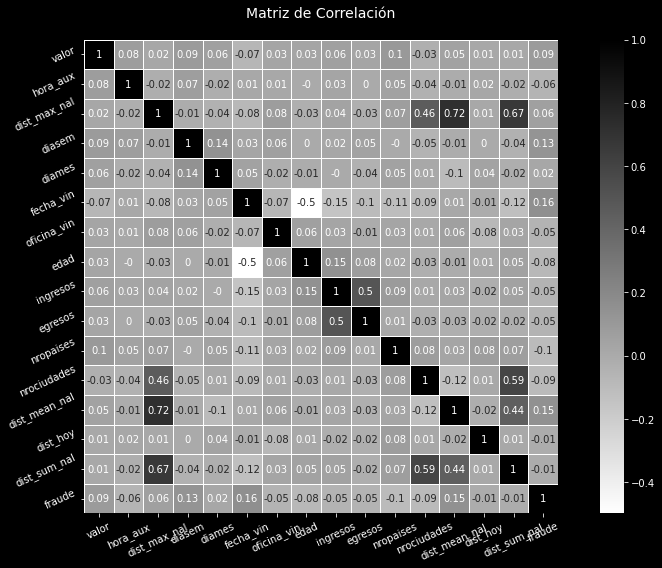

In [17]:
# Correlación entre predictores
%matplotlib inline
correlations = pd.concat((data, dataset['fraude']), axis=1).corr(method='pearson').round(2)
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, vmax=1, annot=True, cmap='gist_yarg', linewidths=1, square=True)
plt.title('Matriz de Correlación\n', fontsize=14)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10, rotation=25)
plt.tight_layout()

* Hay 2 predictores que se encuentran altamente **correlacionados** entre sí: `dist_max_nal` y `nrociudades`. 
    - Esto tiene mucho sentido porque el número de ciudades nacionales visitadas y la distancia máxima recorrida a nivel nacional inducen causalidad entre ellas.
* También el caso de `dist_max_nal` y `dist_sum_nal`.
    - Básicamente responden a lo mismo.
* Esto puede ser un problema porque no son explicativos con el **target**, podemos plantearnos la idea de deshacernos de `dist_max_nal`.

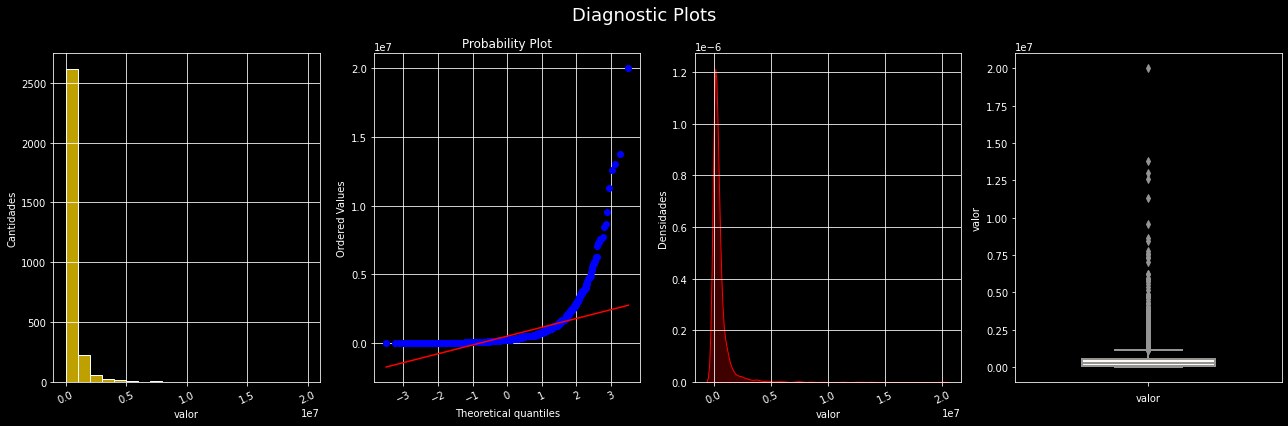

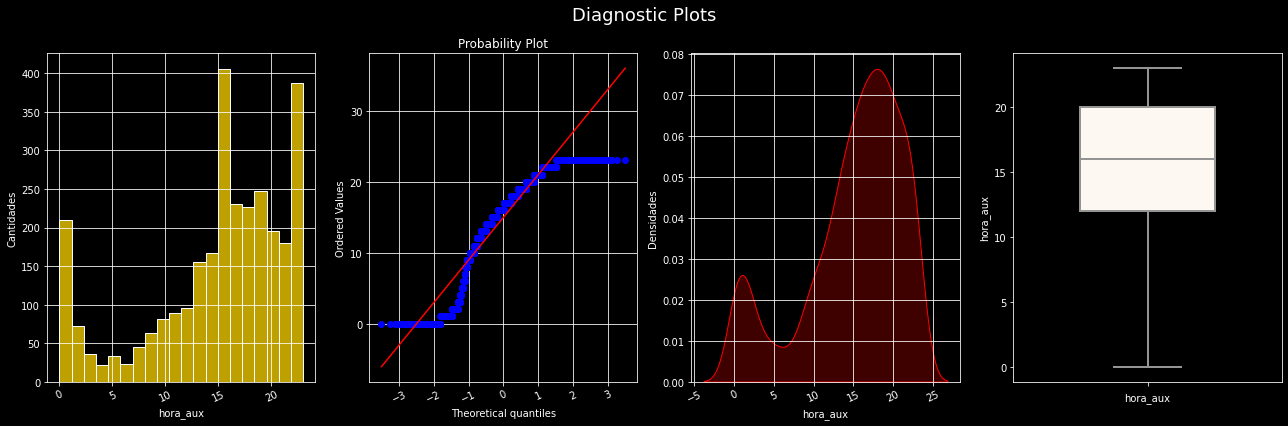

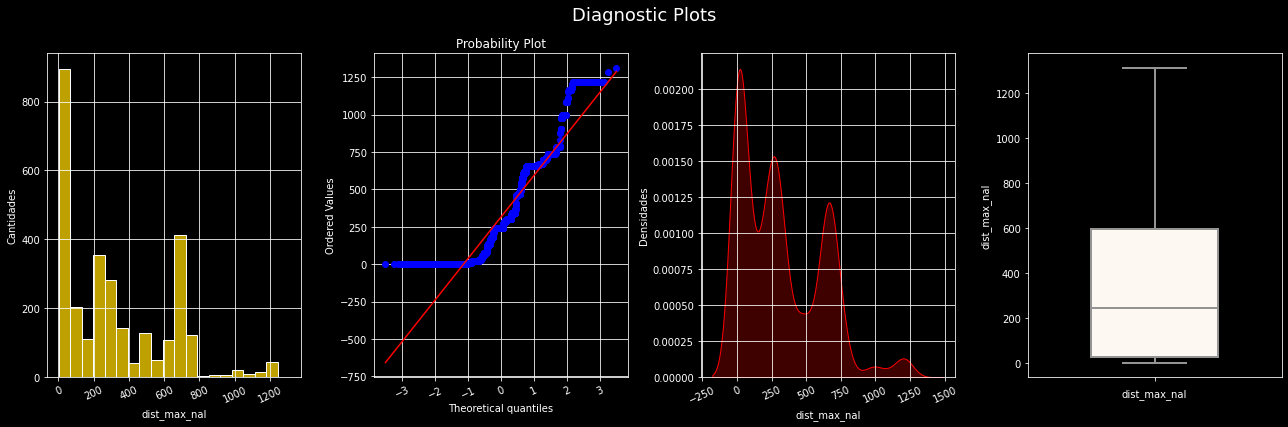

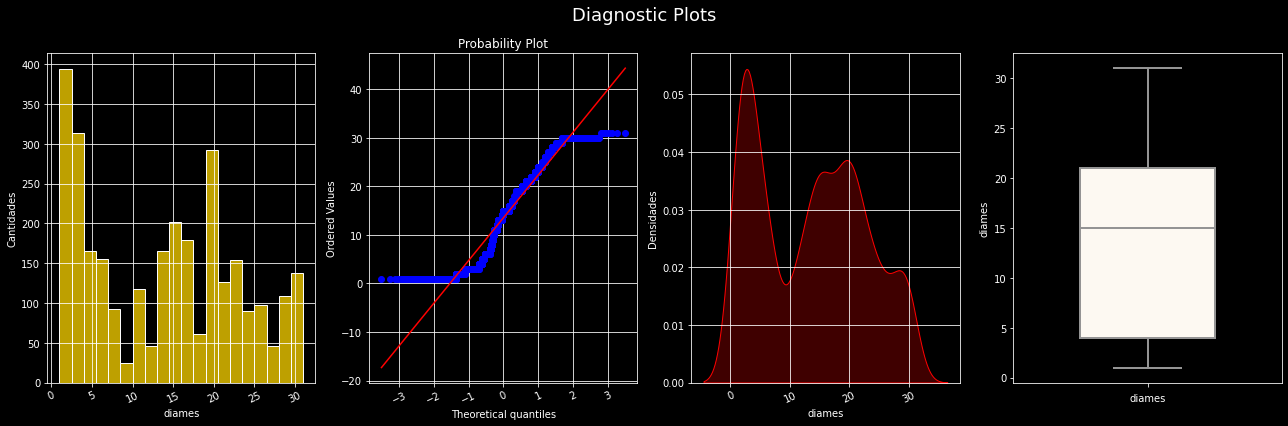

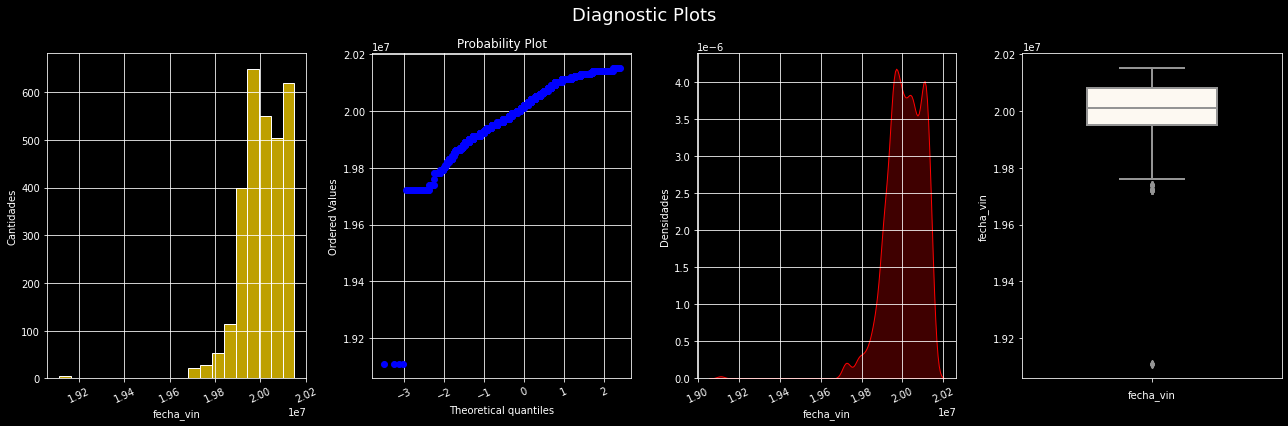

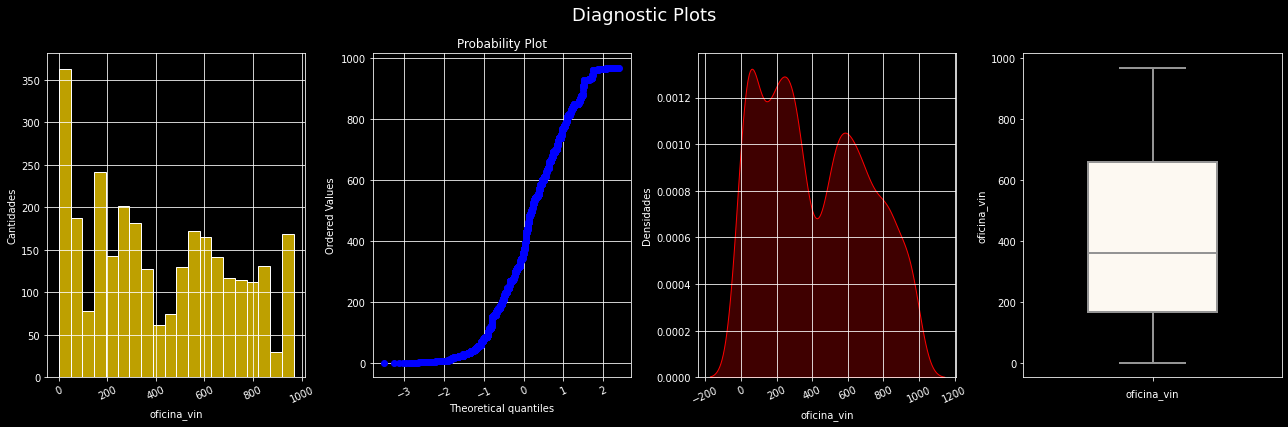

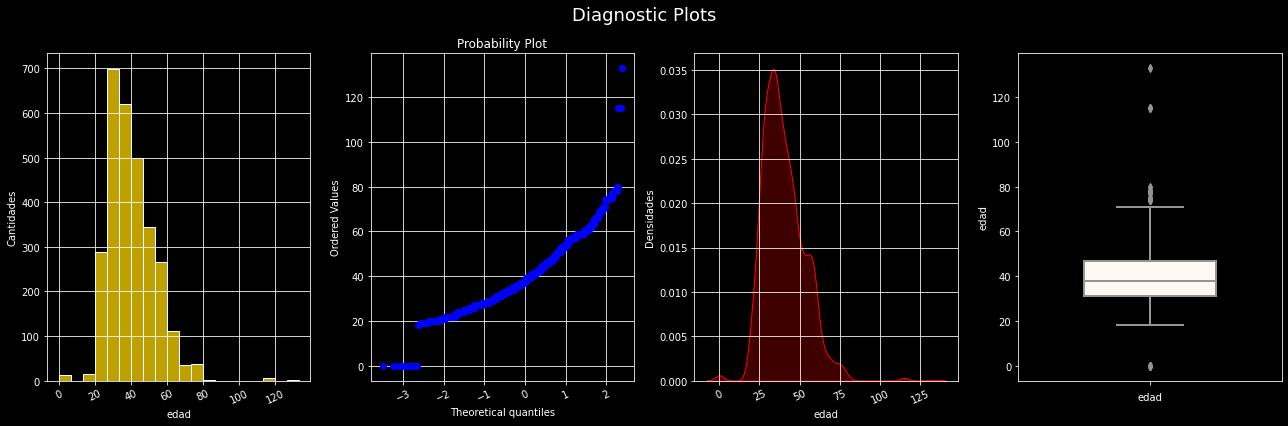

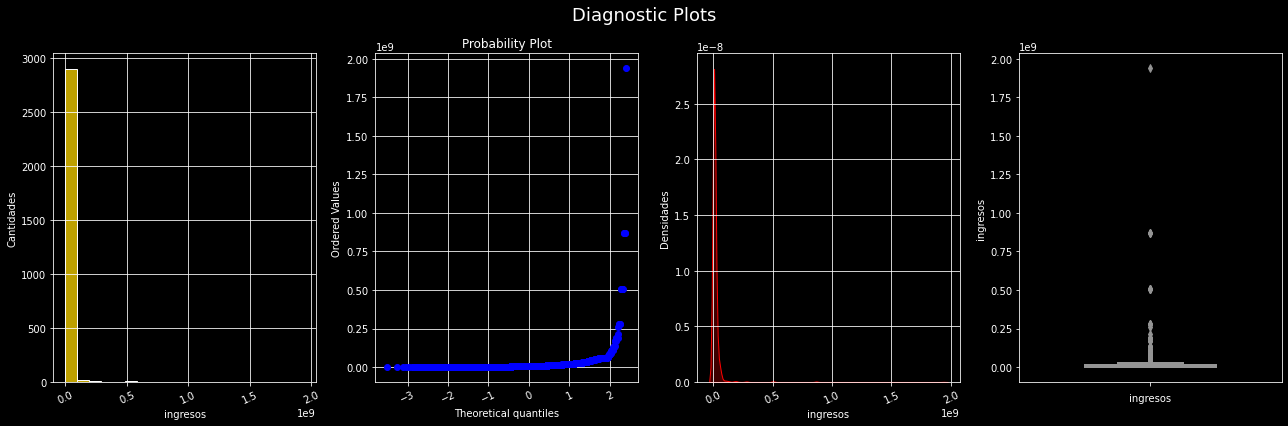

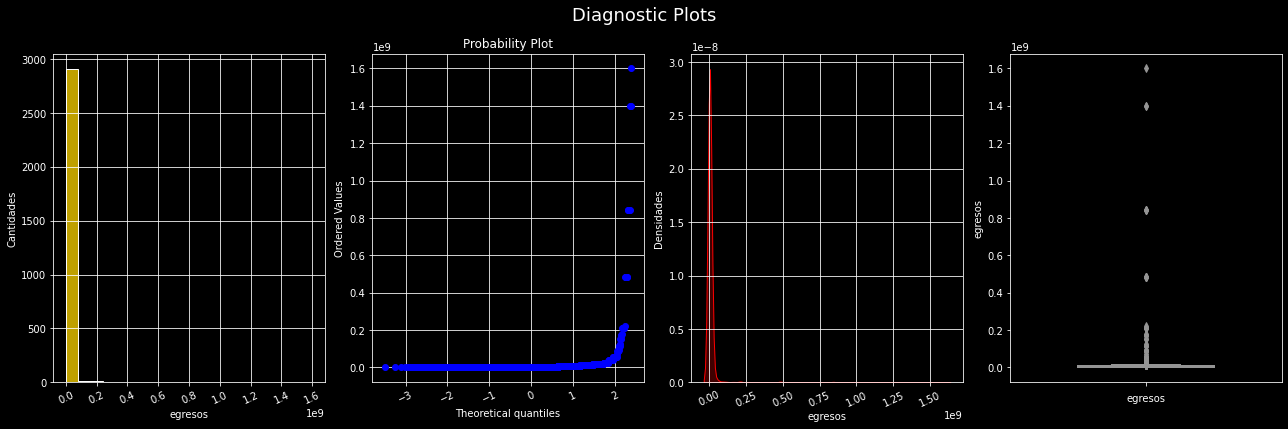

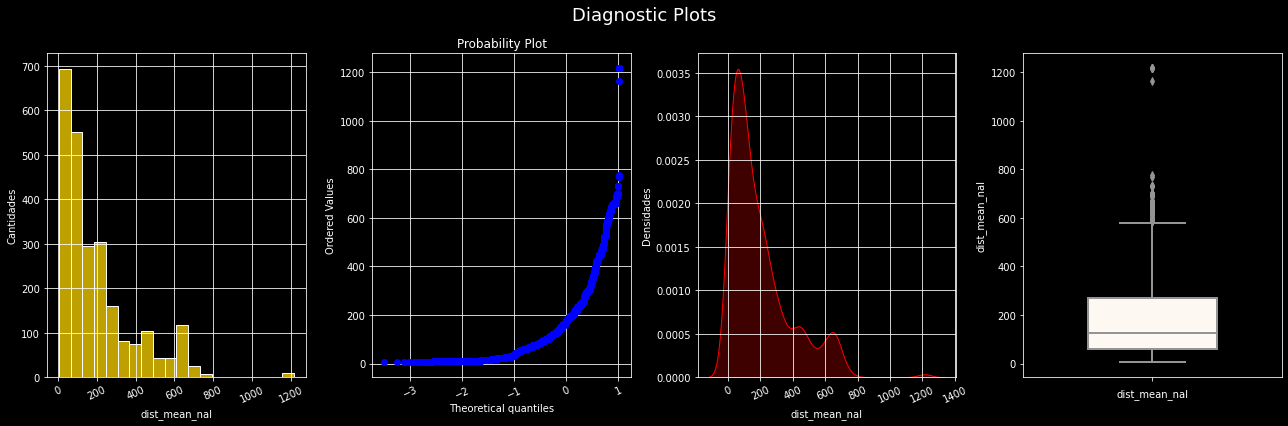

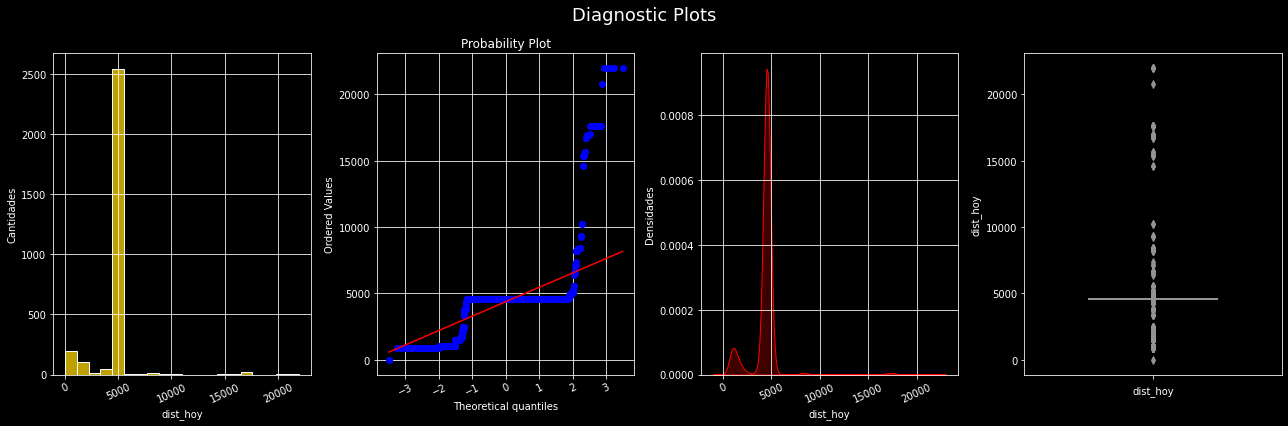

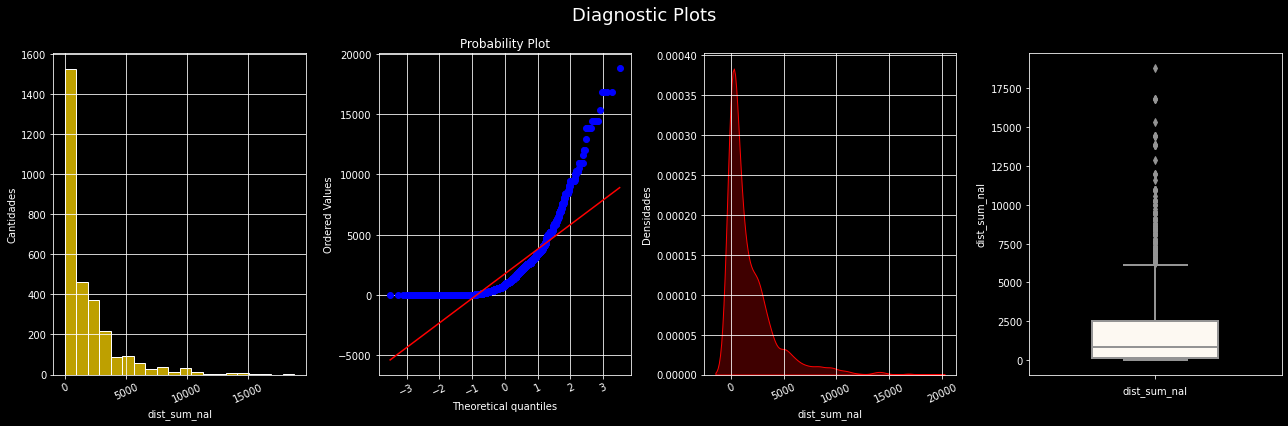

In [18]:
# Función diagnóstico para variables continuas
def diagnostic_plots(data:DataFrame, variables:list):
    
    import scipy.stats as stats

    data = data[variables]
    for var in data:
        plt.style.use('dark_background')
        fig, axes = plt.subplots(1, 4, figsize=(18, 6))
        fig.suptitle('Diagnostic Plots', fontsize=18)

        plt.subplot(1, 4, 1)
        sns.histplot(data[var], bins=20, color='gold')
        plt.ylabel('Cantidades')
        plt.xticks(rotation=25)
        plt.grid(which='major')

        plt.subplot(1, 4, 2)
        stats.probplot(data[var], dist='norm', plot=plt)
        plt.xticks(rotation=25)
        plt.grid()

        plt.subplot(1, 4, 3)
        sns.kdeplot(data[var], shade=True, color='red')
        plt.ylabel('Densidades')
        plt.xticks(rotation=25)
        plt.grid()

        plt.subplot(1, 4, 4)
        sns.boxplot(y=data[var], color='floralwhite', linewidth=2, width=0.5)

        plt.xlabel(var)
        fig.tight_layout()


# Variables continuas
diagnostic_plots(data=data, variables=continuous)

* Se puede observar con mucha facilidad que tan **sesgadas** se encuentran la mayoría de predictores continuos del dataset.
* Muchos outliers y variables con colas en sus distribuciones.
* Lo más seguro es plantearnos la idea de **discretizar** la gran parte de estos predictores para encontrar una **relación monotónica** con el **target**.

### **Outliers**

In [19]:
# Función para detectar el número de registros con outliers a 1.5 std
def get_outliers(data:DataFrame, std:float) -> list:

    """
    Returns a list of rows with outliers, 
    we define the upper and lower limit to 1.5 std
    Args:
        data: DataFrame
    Returns:
        list: outliers
    Note: At std you could use 1.5 or 3 as typical values
    """

    outliers = list()

    # Std & Mean
    data_std = data.std()
    data_mean = data.mean()

    # Cotas
    anomaly_cut_off = data_std * std
    # Inferior
    lower_limit = data_mean - anomaly_cut_off
    # Superior
    upper_limit = data_mean + anomaly_cut_off

    # Generamos los outliers
    for index, row in data.iterrows():     
        outlier = row
        if (outlier.iloc[0] > upper_limit[0]) or (outlier.iloc[0] < lower_limit[0]):
            outliers.append(index)

    return outliers

# Fijamos a 1.5 de desvación estándar de los valores con respecto a la media
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

Número de registros que contienen outliers: 126
Porcentaje de outliers en el dataset: 4.25%


* Como pudimos darnos cuenta una fracción pequeña de outliers en el dataset alrededor del 4.25%.
* Al **discretizar** podremos manejar este problema, para que no introduzca ruido en nuestro modelo.

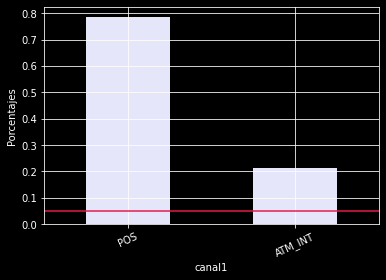

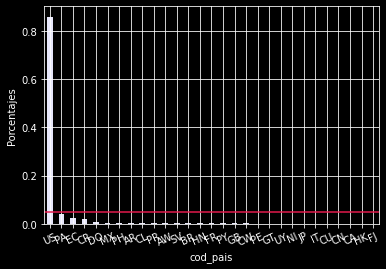

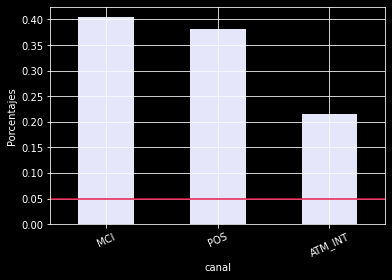

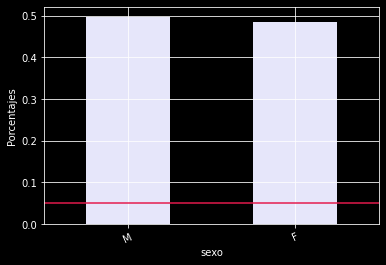

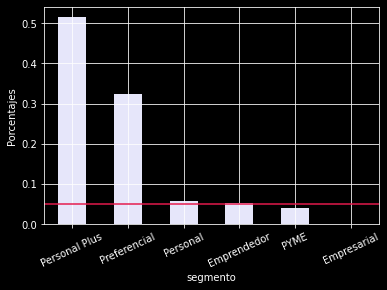

In [20]:
# Función para graficar variables categóricas poco comunes y su cardinalidad
def categoricals_plot(data:DataFrame, variables: list):

    for var in variables:
        plt.style.use('dark_background')
        temp_dataframe = pd.Series(data[var].value_counts() / len(data))

        # Graficar con los porcentajes
        fig = temp_dataframe.sort_values(ascending=False).plot.bar(color='lavender')
        fig.set_xlabel(var)

        # Añadir una línea horizontal a 5% para resaltar categorías poco comunes
        fig.axhline(y=0.05, color='#e51a4c')
        fig.set_ylabel('Porcentajes')

        plt.xticks(rotation=25)
        plt.grid()
        plt.show()


# Etiquetas poco comunes en las variables categóricas
categoricals_plot(data=data, variables=categoricals)

* Podemos notar que en las variables categóricas como es el caso de `cod_pais` tiene una altísima cardinalidad y posee muchas etiquetas o categorías poco comúnes.
    - Lo mejor sería colocarlas una etiqueta poco común a las que estén por debajo del 5%.
* Lo mismo ocurre con `segmento` pero en menor cuantía con la etiquetas poco comúnes.

### **Imputación**

In [21]:
print('\t\tIMPUTACIÓN\n')
print(f"""• Las variables categóricas con datos faltantes por debajo del 5% {categoricals_less_than_5perc} les agregaremos una etiqueta dedicada llamada `Missing`\n""")
print(f"""• Las variables continuas que están por debajo del 5% de datos faltantes {continous_less_than_5perc}, se les hará una imputación de una muestra aleatoria.
Mientras que las continuas por encima del 5% {continous_more_than_5perc}, se le hará una imputación a la media con un indicador de ausencia""")

		IMPUTACIÓN

• Las variables categóricas con datos faltantes por debajo del 5% ['sexo', 'segmento'] les agregaremos una etiqueta dedicada llamada `Missing`

• Las variables continuas que están por debajo del 5% de datos faltantes ['fecha_vin', 'oficina_vin', 'edad', 'ingresos', 'egresos'], se les hará una imputación de una muestra aleatoria.
Mientras que las continuas por encima del 5% ['dist_mean_nal'], se le hará una imputación a la media con un indicador de ausencia


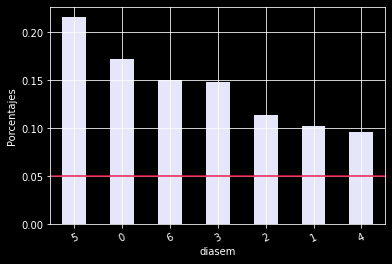

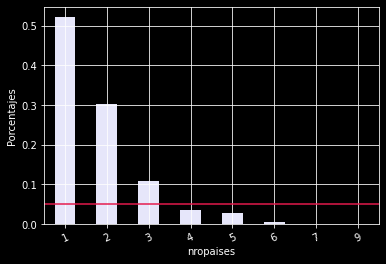

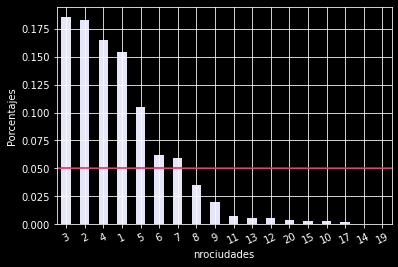

In [22]:
# Variables discretas
categoricals_plot(data=data, variables=discretes)

* En las variables discretas podemos notar que `nrociudades` tiene una elevadisíma cardinalidad y hay que tratarle igual con etiquetas poco comúnes.
* Lo mismo le ocurre a `nropaises` pero en menor medida.

### **Codificación**

In [23]:
# Variables categóricas con alta cardinalidad y baja cardinalidad
# Por medio del barplot definimos 2 etiquetas en la alta cardinalidad y 4 en la baja cardinalidad de las variables categóricas
categoricals_high_cardinality = ['cod_pais']
categoricals_low_cardinality = [cat for cat in categoricals if cat not in categoricals_high_cardinality]
print(f'Variables categórcias con alta cardinalidad: {categoricals_high_cardinality}') # 2 Categorías/etiquetas en el transformador
print(f'Variables categórcias con baja cardinalidad: {categoricals_low_cardinality}') # 4 Categorías/etiquetas en el transformador

Variables categórcias con alta cardinalidad: ['cod_pais']
Variables categórcias con baja cardinalidad: ['canal1', 'canal', 'sexo', 'segmento']


In [24]:
# Variables discretas con alta cardinalidad y baja cardinalidad
# Por medio del barplot definimos 7 etiquetas en la alta cardinalidad y 5 en la baja cardinalidad de las variables discretas
discretes_high_cardinality = ['nrociudades', 'nropaises']
discretes_low_cardinality = [var for var in discretes if var not in discretes_high_cardinality]

print(f'Variables discretas con alta cardinalidad: {discretes_high_cardinality}') # 7 Categorías/etiquetas en el transformador
print(f'Variables discretas con baja cardinalidad: {discretes_low_cardinality}') # 5 Categorías/etiquetas en el transformador

Variables discretas con alta cardinalidad: ['nrociudades', 'nropaises']
Variables discretas con baja cardinalidad: ['diasem']


In [25]:
# Variables altamente correlacionadas
data.drop(['dist_max_nal'], axis=1, inplace=True)

# Dropeamos los predictores que no coinciden
drop = [col for col in X_val.columns if col not in data.columns]
X_val.drop(drop, axis=1, inplace=True)

# Comparando los resultados
print(data.columns.sort_values(), '\n')
print(X_val.columns.sort_values())

Index(['canal', 'canal1', 'cod_pais', 'diames', 'diasem', 'dist_hoy',
       'dist_mean_nal', 'dist_sum_nal', 'edad', 'egresos', 'fecha_vin',
       'hora_aux', 'ingresos', 'nrociudades', 'nropaises', 'oficina_vin',
       'segmento', 'sexo', 'valor'],
      dtype='object') 

Index(['canal', 'canal1', 'cod_pais', 'diames', 'diasem', 'dist_hoy',
       'dist_mean_nal', 'dist_sum_nal', 'edad', 'egresos', 'fecha_vin',
       'hora_aux', 'ingresos', 'nrociudades', 'nropaises', 'oficina_vin',
       'segmento', 'sexo', 'valor'],
      dtype='object')


1. Nos deshacemos del predictor que encontramos inicialmente **altamente correlacionado**.
2. Ajustamos los predictores con el conjunto de validación para avanzar con el separamiento de los datos.
3. Comparamos si está todo en orden.

In [26]:
# Capturamos nuevamente los tipos de variables
variables = capture_variables(data=data)

# Unpacking
numericals, categoricals, _, discretes, continuous = variables

		Tipos de variables
Hay 11 variables continuas
Hay 3 variables discretas
Hay 0 variables temporales
Hay 5 variables categóricas


### **Separando el dataset**

In [27]:
# Separamos los conjuntos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, dataset[['fraude']], test_size=0.3, random_state=seed, stratify=dataset['fraude'])
print(f'Train set: {X_train.shape} {y_train.shape}')
print(f'Test set: {X_test.shape} {y_test.shape}')

Train set: (2075, 19) (2075, 1)
Test set: (890, 19) (890, 1)


1. Realizamos la separación de nuestros conjuntos de datos de train y test en 70% y 30% respectivamente.
2. Fijamos nuestra semilla para que sea reproductible el experimento.
3. Estratificamos nuestro target.

In [28]:
# Vamos a manipular las variables discretas como si fueran categóricas
X_train[discretes] = X_train[discretes].astype('category')
X_test[discretes] = X_test[discretes].astype('category')
X_val[discretes] = X_val[discretes].astype('category')

### **Ingeniería de variables**

In [29]:
# Pipeline
from sklearn.pipeline import Pipeline
from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import CountFrequencyEncoder, RareLabelEncoder
from feature_engine.discretisation import DecisionTreeDiscretiser
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    # Imputación de datos faltantes
    ('imputer_random_continous_less_than_5perc', RandomSampleImputer(random_state = 25, variables = continous_less_than_5perc)),

    ('imputer_missing_indicator', AddMissingIndicator(variables = continous_more_than_5perc)), # Indicador de ausencia

    ('imputer_mean_continous', MeanMedianImputer(imputation_method = 'mean', variables = continous_more_than_5perc)), # Imputación por la media a las continuas por encima del 5%

    ('imputer_missing_categoricals_less_than_5perc', CategoricalImputer(imputation_method = 'missing', variables = categoricals_less_than_5perc)),

    # Codificación de variables categóricas y discretas
    ('rare_label_enc_cat_high_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 2, variables = categoricals_high_cardinality)),
    
    ('rare_label_enc_cat_low_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 4, variables = categoricals_low_cardinality)),
    
    ('rare_label_enc_disc_high_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 7, variables = discretes_high_cardinality)),
    
    ('rare_label_enc_disc_low_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 5, variables = discretes_low_cardinality)),

    ('encoder_categoricals', CountFrequencyEncoder(encoding_method = 'frequency', variables = categoricals + discretes)),
    
    # Discretiazación de variables continuas
    ('tree_discretizer', DecisionTreeDiscretiser(cv = 10, scoring = 'roc_auc', regression = False, variables = continuous,
                                               param_grid={'max_depth': [1,2,3], 'min_samples_leaf' : [10,4]}, random_state = 42)),

    # Estandarización de los datos
    ('scaler', StandardScaler())
])

1. Utilizamos nuestra clase `Pipeline` para hacer el flujo del proceso de forma más eficiente y limpia.
2. El orden lógico del proceso será: imputar,  codificar, discretizar y estandarizar.

In [30]:
# 1. Ajustemos el Pipeline con los datos de entrenamiento
pipe.fit(X_train, y_train)

# 2. Hacemos una transformación: trasladando los cambios del train a los otros conjuntos de datos
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
X_val = pipe.transform(X_val)

# Dimensionalidad
print(X_train.shape, X_test.shape, X_val.shape)

(2075, 20) (890, 20) (100, 20)


1. Ajustamos nuestro objeto instanciado con los datos de entrenamiento.
2. Transformamos nuestros otros conjuntos de datos a partir del de entrenamiento.
3. Observamos los cambios realizados.
4. Creció una dimensión porque nuestro predictor `dist_mean_nal` le pusimos un **indicador de ausencia**.

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Modelo instanciado
model = HistGradientBoostingClassifier(random_state=seed)

# Ajustamos
model.fit(X_train, y_train)

# Predicciones
train_preds = model.predict(X_train)
train_preds[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int16)

1. Inicialmente concluimos que de acuerdo a la naturaleza de los datos era una buena elección usar un algoritmo de tipo árbol.
2. Instanciamos en un objeto nuestro **clasificador**.
3. Ajustamos nuestro **clasificador** con el conjunto de entrenamiento.
4. Realizamos las **predicciones probabilísticas**.

### **Ajuste y predicción**

In [32]:
# Modelo instanciado
model2 = HistGradientBoostingClassifier(random_state=seed)

# Ajustamos
model2.fit(X_train, y_train)

# Predicciones
test_preds = model2.predict(X_test)
test_preds[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int16)

* Realizamos los pasos anteriores para nuestro conjunto de prueba.

In [33]:
# Ajuste
model.fit(X_train, y_train)

# Predicciones
val_preds = model.predict_proba(X_val)[:,1]
val_preds[:10]

array([0.42490525, 0.00167889, 0.90940511, 0.97818522, 0.97183857,
       0.00727492, 0.02628554, 0.03926823, 0.02903528, 0.01032376])

1. Ahora ajustamos nuestros datos de validación con nuestro conjunto de entrenamiento.
2. Cabe destacar que hasta este punto el modelo no había tocado este conjunto de datos.

### **Evaluación**

In [34]:
# Evaluamos el modelo
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# K-Folds
rkfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)

# Función para hallar la validación cruzada
def cross_validation(model, X, y, scoring:str, display_name:str):
    
    cv_results = cross_val_score(model, X, y, cv=rkfold, scoring=scoring, n_jobs=-1)
    print(f'{display_name}: {np.mean(cv_results)*100:0.2f}% | {display_name} Std: {np.std(cv_results)*100:0.2f}%')


# Validación cruzada train y test
cross_validation(model, X=X_train, y=y_train, scoring='roc_auc', display_name='ROC AUC')
cross_validation(model2, X=X_test, y=y_test, scoring='roc_auc', display_name='ROC AUC')

ROC AUC: 97.27% | ROC AUC Std: 1.10%
ROC AUC: 93.18% | ROC AUC Std: 3.29%


1. Evaluamos el ajuste del modelo con ambos conjuntos tanto de entrenamiento y prueba y maximizando la métrica de `roc_auc`.
2. Realizando una **validación cruzada** con 10 **folds** para ser rigurosos con el ajuste del modelo.
3. Visualizamos los resultados tanto la **media** de las validaciones como la **desviación estándar** de las mismas.

In [35]:
# Performance del modelo de train
from sklearn.metrics import roc_auc_score
print('Métricas sobre el train set')
print(f'ROC AUC Score: {roc_auc_score(y_train, train_preds)*100:0.2f}%\n')

# Performance del modelo de test
print('Métricas sobre el test set')
print(f'ROC AUC Score: {roc_auc_score(y_test, test_preds)*100:0.2f}%\n')

# Comparando los resultados
print(f'Número total de etiquetas: {X_test.shape[0]}')
print(f'Número total de etiquetas mal predecidas: {(y_test.squeeze() != test_preds).sum()}')
print(f'Performance del modelo: {(1 - (y_test.squeeze() != test_preds).sum() / X_test.shape[0])*100:0.2f}%')

Métricas sobre el train set
ROC AUC Score: 99.71%

Métricas sobre el test set
ROC AUC Score: 91.52%

Número total de etiquetas: 890
Número total de etiquetas mal predecidas: 56
Performance del modelo: 93.71%


* Vemos las métricas de las predicciones que tan confiables pueden ser.
* Al parecer nuestro modelo generaliza lo suficientemente bien.
* A simple vista parece no haber **overfitting** en el modelo.

In [36]:
# Predicciones
predicciones = pd.DataFrame(val_preds, columns=['FRAUDE'])

# Exportar a csv
predicciones.to_csv(r'test_evaluado.csv', index=False, encoding='utf-8')

1. Casteamos nuestras predicciones a un `Dataframe`.
2. Exportamos los resultados de las **predicciones** en un csv para comparar los resultados con el dataset de validación.